# Phishing Email Detector using Naive-Bayes Algorithm

We test three types of **Naive-Bayes algorithm** in this notbook (*GaussianNB & BernoulliNB and MultinomialNB*). According to our literature survey they should provide underwhelming results. We will try to define an ensemble model using the above three classification models in order to improve the accuracy. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

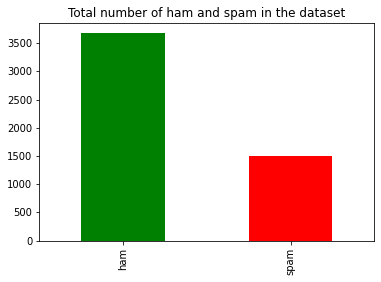

In [ ]:
import matplotlib.pyplot as plt
df['label'].value_counts().plot.bar(color = ["g","r"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

In [ ]:
import numpy as np
df=df.replace(np.nan,'hello how are you')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
print(X.toarray())


[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**GaussianNB**
*Can perform online updates to model parameters via partial_fit. For details on algorithm used to update feature means and variance online*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X=X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.3, random_state=55)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.9594072164948454

**BernoulliNB** 
*Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.*

In [ ]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.8582474226804123

In [ ]:
#To preprocess the data and remove any negative value as MultinomialNB does not work for negative values
from sklearn.preprocessing import MinMaxScaler   
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**MultnomialNB** *The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts.*

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.9458762886597938

In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = X[:, 1:]

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size = 0.15, random_state = 0)

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Ensemble Algorithm**
*A single algorithm may not make the perfect prediction for a given dataset. Machine learning algorithms have their limitations and producing a model with high accuracy is challenging. If we build and combine multiple models, the overall accuracy could get boosted. The combination can be implemented by aggregating the output from each model with two objectives: reducing the model error and maintaining its generalization. The way to implement such aggregation is done below:*

In [ ]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []

In [ ]:
#Defining 5 Gaussian Naive Bayes classifiers
model1 = GaussianNB()
estimators.append(('nbs1', model1))
model2 = GaussianNB()
estimators.append(('nbs2', model2))
model3 = GaussianNB()
estimators.append(('nbs3', model3))
model4 = GaussianNB()
estimators.append(('nbs4', model4))
model5 = GaussianNB()
estimators.append(('nbs5', model5))

In [ ]:
#Defining 5 Bernoulli Naive Bayes classifiers
model6 = BernoulliNB()
estimators.append(('bnbs1', model6))
model7 = BernoulliNB()
estimators.append(('bnbs2', model7))
model8 = BernoulliNB()
estimators.append(('bnbs3', model8))
model9 = BernoulliNB()
estimators.append(('bnbs4', model9))
model10 = BernoulliNB()
estimators.append(('bnbs5', model10))

In [ ]:
#Defining 5 Multinomial Naive Bayes classifiers
model11 = MultinomialNB()
estimators.append(('mnb1', model11))
model12 = MultinomialNB()
estimators.append(('mnb2', model12))
model13 = MultinomialNB()
estimators.append(('mnb3', model13))
model14 = MultinomialNB()
estimators.append(('mnb4', model14))
model15 = MultinomialNB()
estimators.append(('mnb5', model15))

**Ensemble models** is a machine learning approach to combine multiple other models in the prediction process. Those models are referred to as base estimators.

In [ ]:
# Defining the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [ ]:
#Confusionn matrix
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)
print(cm_HybridEnsembler)

[[544   6]
 [ 40 186]]


In [ ]:
#from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.9407216494845361

**Conclusion:**
*We find out that the accuracy of the ensemble is much greater than BernoulliNB but is very close to that of the GaussianNB and MultinomialNB.*